In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import bokeh
import matplotlib as mpl
from matplotlib import rcParams, rc
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

import numpy as np
import math
from scipy.interpolate import griddata

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches


plt.style.use('../../Paul_style.txt')
plt.rcParams["font.family"] = "Serif"

cm_name = 'turku'
cm_file = np.loadtxt(f'../../ScientificColourMaps7/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

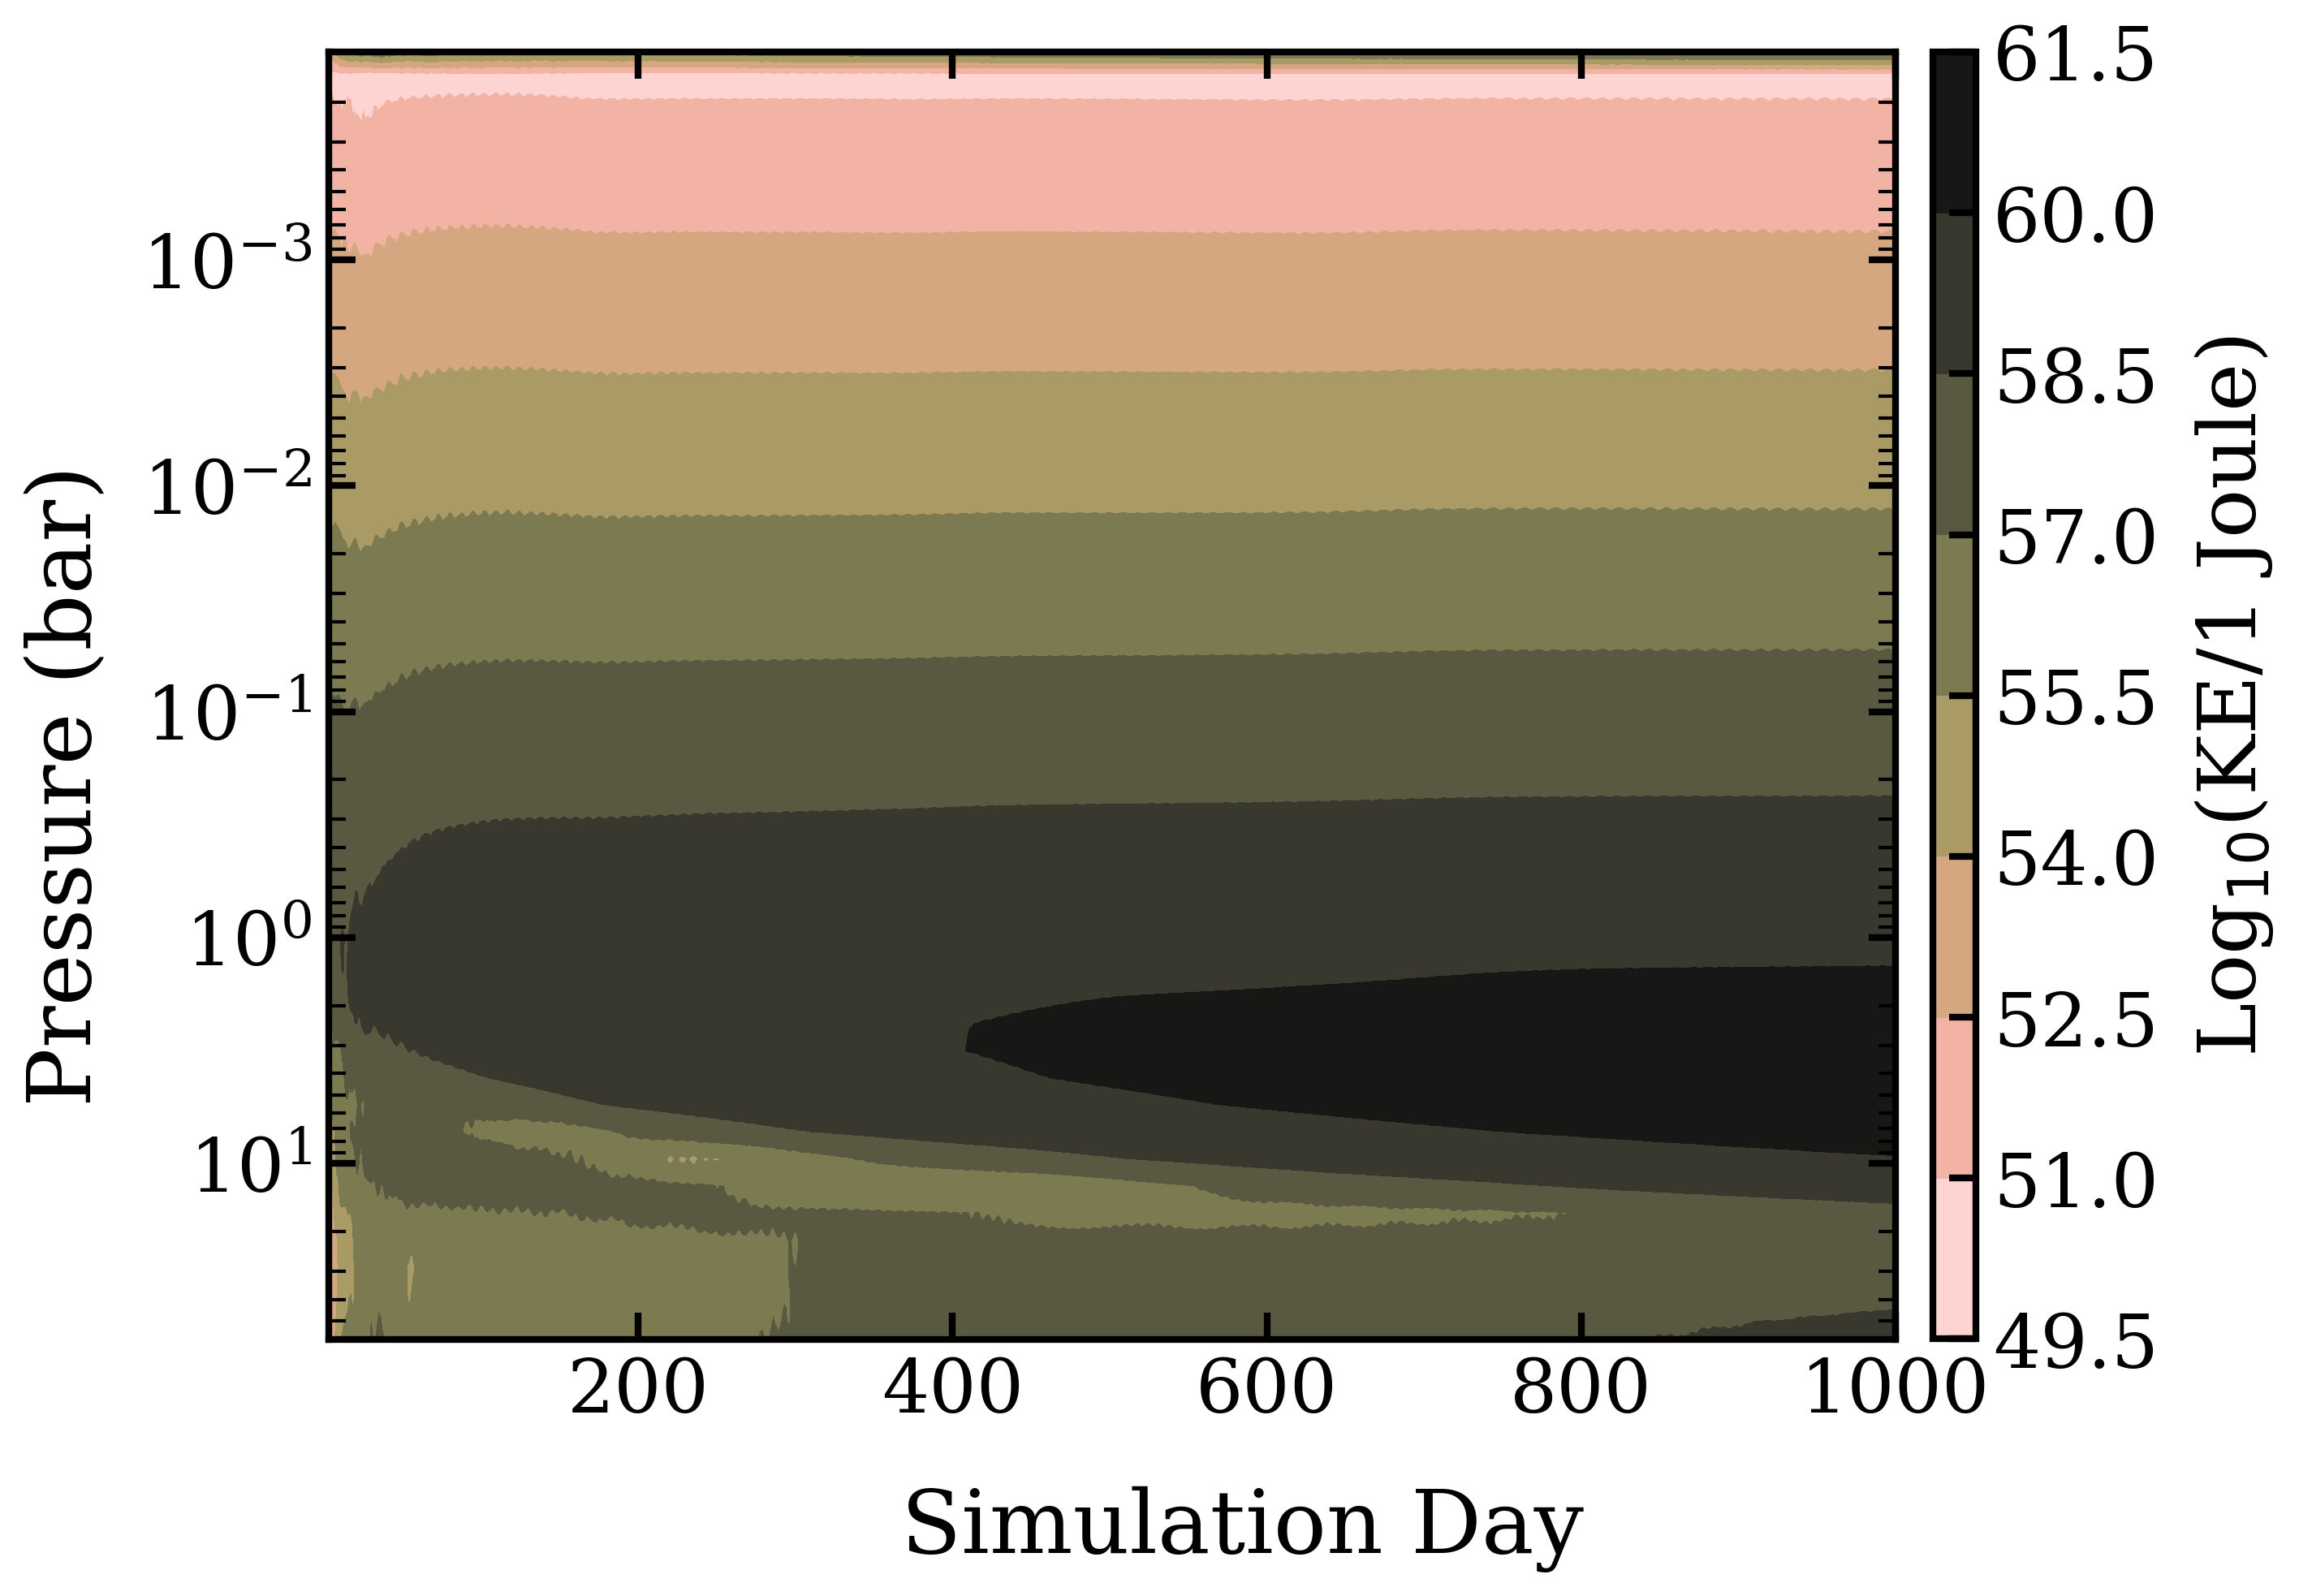

In [16]:
# Figure aesthetics
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7),sharex=True, sharey=True,squeeze=True)
plt.subplots_adjust(hspace=0.1, wspace=0.05)  

paths = ['../Spectral-Processing/GCM-OUTPUT/HD189-DOGRAY']


oom=6
surfp=100
nlay=50
nlev=nlay
nday=1000

i = 0
for path in paths:
    with open(path+'/Planet_Run/'+'fort.52','r') as data_52:
        ke=[] #kinetic energy 
        cpt=np.zeros((nlay,nday+91))*np.nan #kinetic energy and cpt
        dayval=[] #column corresponding to the day 
        daycount=0
        laycount=0
        for line in data_52:
            p=line.split()

            if laycount < nlay-1: 
                ke.append(float(p[0]))
                if daycount != nday+91:
                    cpt[laycount,daycount]=(float(p[0]))
                    dayval.append(daycount)
                    laycount=laycount+1
            else:
                laycount=0
                ke.append(float(p[0]))
                if daycount != nday+91:
                    cpt[laycount,daycount]=(float(p[0]))
                    dayval.append(daycount)
                    daycount=daycount+1

        cpt=cpt*surfp*100000
        sigma=np.empty([nlev])*0.0
        stp=-1.0*oom/nlev
        sigma[nlev-1]=10.**(stp/2.)
        for n in range(nlev-2,-1,-1):
            sigma[n]=sigma[n+1]*10.**(stp)


    p_BAR=sigma*surfp
    cpt=cpt+.01
    cpt=np.log(cpt)
    daylist=np.arange(3,nday+1,1)

    newke=cpt[:,3:nday+1]
    daylist=daylist[:]
    p_BAR=p_BAR[:nlay]
    day,PRESS_P=np.meshgrid(daylist,p_BAR)
    countour_plot=axes.contourf(day,PRESS_P,newke,cmap=my_colors)
    i = i + 1

cbar = fig.colorbar(countour_plot, aspect=30, pad=0.02)
cbar.set_label(r'Log$_{10}$(KE/1 Joule)', labelpad=10, size=24)
axes.set_yscale('log')
axes.set_ylim([0.6e2, 1.2e-4])


fig.text(0.5, 0.00, r"Simulation Day",  size=26, ha='center')
fig.text(0.0, 0.45, r"Pressure (bar)",  size=26, va='center', rotation='vertical')

fig.savefig('../Figures/kinetic-energy-evolution.png', bbox_inches='tight', dpi=250)